## Load Dependencies

In [1]:
import os
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [2]:
traj = md.load_xtc('../Setup/2JOF_AMBER/gromacs/step5_traj_cat_center.xtc',
                   top='../Setup/2JOF_AMBER/gromacs/step5_noWater.gro')

In [5]:
# compute the distance between the first and last atom
def get_dist(traj):
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist
dist = get_dist(traj)

# compute the radius of gyration at each time
def get_gyra(traj):
    gyration = md.compute_rg(traj)
    return gyration
gyra = get_gyra(traj)

for idx, t in enumerate(traj.time):
    print(f'In time {t}, the end-end distance is {dist[idx]:.3f}, '
          f'the radius of gyration is {gyra[idx]:.3f}')

In time 0.0, the end-end distance is 1.310, the radius of gyration is 0.742
In time 100.0, the end-end distance is 1.090, the radius of gyration is 0.743
In time 200.0, the end-end distance is 1.191, the radius of gyration is 0.750
In time 300.0, the end-end distance is 1.073, the radius of gyration is 0.738
In time 400.0, the end-end distance is 1.233, the radius of gyration is 0.739
In time 500.0, the end-end distance is 0.984, the radius of gyration is 0.740
In time 600.0, the end-end distance is 1.140, the radius of gyration is 0.739
In time 700.0, the end-end distance is 1.233, the radius of gyration is 0.742
In time 800.0, the end-end distance is 1.224, the radius of gyration is 0.737
In time 900.0, the end-end distance is 1.117, the radius of gyration is 0.736
In time 1000.0, the end-end distance is 1.057, the radius of gyration is 0.732
In time 1100.0, the end-end distance is 1.480, the radius of gyration is 0.731
In time 1200.0, the end-end distance is 1.256, the radius of gyr

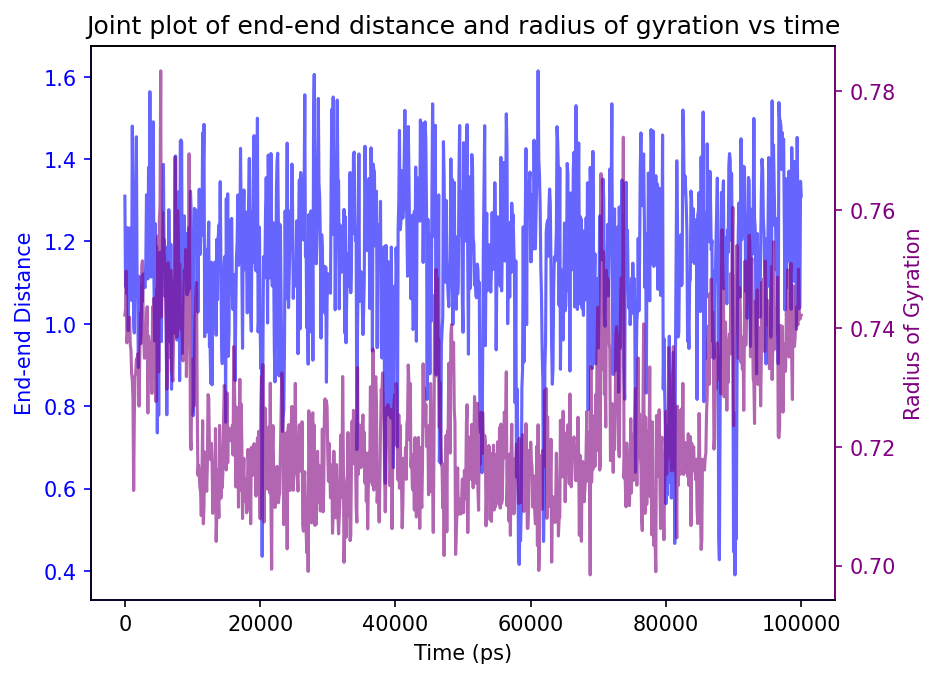

In [6]:
# end-end distance-time and radius of gyration-time line plots with shared x-axis
time = traj.time
fig, ax1 = plt.subplots(dpi=150)

ax1.plot(time, dist, color='blue', alpha=0.6)
ax1.set_ylabel('End-end Distance')
ax1.spines['left'].set_color('blue')
ax1.spines['bottom'].set_color('blue')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')

ax2 = ax1.twinx()

ax2.plot(time, gyra, color='purple', alpha=0.6)
ax2.set_ylabel('Radius of Gyration')
ax2.spines['right'].set_color('purple')
ax2.yaxis.label.set_color('purple')
ax2.tick_params(axis='y', colors='purple')

ax1.set_xlabel('Time (ps)')

plt.title('Joint plot of end-end distance and radius of gyration vs time')
plt.savefig('../Figures/end2end_dist_radius_gyra_vs_time.png')
plt.show()